In [36]:
# Script Name: Assignment 8
# Purpose of script: Complete Assignment 8 for Econ 320
# Author: Gavin Mason
# Date Created: 11/1/2022
# Notes:

# Packages
import os
import numpy as np
import math
import matplotlib.pyplot as plt
import statistics
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

In [37]:
rng = np.random.RandomState(int(11212001))
n = 1000000
b0 = 3
b1 = 2
b2 = 2
a0 = 2
a1 = 0.8
x1 = np.random.normal(10,1**0.5,n)
u = np.random.normal(0,1**0.5,n)
u1 = np.random.normal(0,1**0.5,n)
x2 = a0 + a1*x1 + u1
y = b0 + b1*x1 + b2*x2 + u
population_data = pd.DataFrame({'y':y, 'x1':x1, 'x2':x2})

In [38]:
covX1X2 = population_data[['x1','x2']].cov().iloc[0,1]
print("covx1x2 =", covX1X2)

covx1x2 = 0.7991509735638858


In [39]:
sample_df = population_data.sample(n = 1000, random_state = int(11212001))
avgsamplex1=sample_df['x1'].mean()
TSSx1 = ((sample_df['x1']-avgsamplex1)**2).sum()
print("TSSx1 =", TSSx1)

TSSx1 = 955.8569745474978


In [40]:
#Sample beta1 is 3.62 while population beta1 is 2. 
#This displays a certain degree of inaccuracy within our sample data as it's such a considerable difference in values.
reg = smf.ols(formula='y ~ x1', data = sample_df).fit()
reg.params.round(2)

Intercept    6.77
x1           3.62
dtype: float64

In [41]:
#New sample beta1 is 1.98, nearly identical to the true population value of 2.
#Due to the inclusion of an additional independent variable that takes data out of residual and grants more accuracy.
reg1 = smf.ols(formula='y ~ x1 + x2', data = sample_df).fit()
reg1.params.round(2)

Intercept    3.02
x1           1.98
x2           2.02
dtype: float64

In [42]:
rep = 1000
b1r = []
for i in range(rep):
    sample = population_data.sample(1000)
    beta0, beta1 = smf.ols('y~x1',data=sample).fit().params
    avgsamplex1=sample['x1'].mean()
    b1r.append(beta1)

Mean of sample b1 distribution = 3.5922155911801474


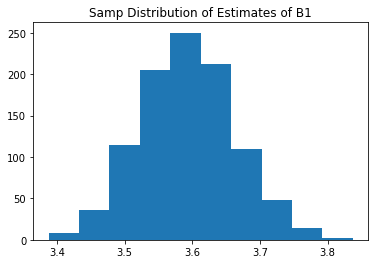

In [43]:
#Mean of b1 distribution is significantly higher than the actual b1 of 2. Difference = 1.59
#from (a)+ (b), I was expecting the same difference of around 1.62 which is true in the case of the calculated 1.59
#I wasn't expecting another rsult. Without x2, the sample values will always be fairly inaccurate
b1= np.array(b1r)
print("Mean of sample b1 distribution =", b1.mean())
figb1, axes = plt.subplots(1,1)
axes.hist(b1)
plt.title('Samp Distribution of Estimates of B1')
plt.show(figb1)